In [1]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np
import matplotlib.pyplot as plt

# set font
import matplotlib as mpl

# for Mac
#mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
mpl.rc('font',family='MS Gothic')


In [2]:
osakamesh1 = gpd.read_file('osakadata/SDDSWS5135.zip')
osakamesh2 = gpd.read_file('osakadata/SDDSWS5235.zip')

In [3]:
osakamesh = gpd.pd.concat([osakamesh1,osakamesh2])

<Axes: >

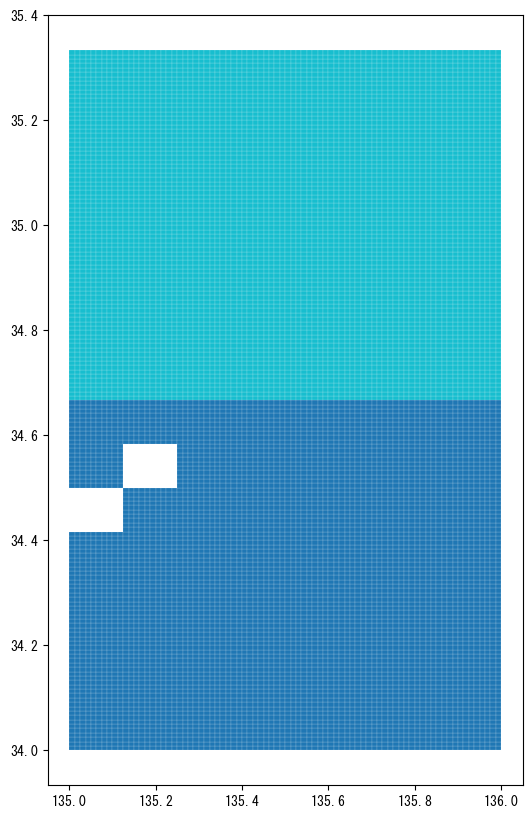

In [4]:
osakamesh.plot(figsize=(10,10),edgecolor='white',linewidth=0.1,column='MESH1_ID')

In [5]:
# csvデータなので pandas (pd) でインポート
# 文字化け予防のために encoding='cp932' 
osakadata1 = pd.read_csv('osakadata/tblT001100S5135.zip', encoding='cp932')
osakadata2 = pd.read_csv('osakadata/tblT001100S5235.zip', encoding='cp932')
osakadata3 = pd.read_csv('osakadata/tblT000846S5135.zip', encoding='cp932')
osakadata4 = pd.read_csv('osakadata/tblT000846S5235.zip', encoding='cp932')

In [6]:
# 8つのテーブルから１行目を削除
osakadata1 = osakadata1[1:]
osakadata2 = osakadata2[1:]
osakadata3 = osakadata3[1:]
osakadata4 = osakadata4[1:]

In [7]:
# ４つのテーブルから「＊」を非数に置き換える
osakadata1 = osakadata1.replace('*',np.nan)
osakadata2 = osakadata2.replace('*',np.nan)
osakadata3 = osakadata3.replace('*',np.nan)
osakadata4 = osakadata4.replace('*',np.nan)

In [8]:
osakadata2020 = pd.concat([osakadata1,osakadata2])

In [9]:
osakadata2015 = pd.concat([osakadata3,osakadata4])

In [10]:
columns_to_drop = ['HTKSYORI','HTKSAKI','GASSAN']
osakadata2020 = osakadata2020.drop(columns=columns_to_drop)

In [11]:
columns_to_drop = ['HTKSYORI','HTKSAKI','GASSAN']
osakadata2015 = osakadata2015.drop(columns=columns_to_drop)

In [12]:
osakadata2020.columns[1:]

Index(['T001100001', 'T001100002', 'T001100003', 'T001100004', 'T001100005',
       'T001100006', 'T001100007', 'T001100008', 'T001100009', 'T001100010',
       'T001100011', 'T001100012', 'T001100013', 'T001100014', 'T001100015',
       'T001100016', 'T001100017', 'T001100018', 'T001100019', 'T001100020',
       'T001100021', 'T001100022', 'T001100023', 'T001100024', 'T001100025',
       'T001100026', 'T001100027', 'T001100028', 'T001100029', 'T001100030',
       'T001100031', 'T001100032', 'T001100033', 'T001100034', 'T001100035',
       'T001100036', 'T001100037', 'T001100038', 'T001100039', 'T001100040',
       'T001100041', 'T001100042', 'T001100043', 'T001100044', 'T001100045',
       'T001100046', 'T001100047', 'T001100048', 'T001100049', 'T001100050'],
      dtype='object')

In [13]:
osakadata2015.columns[1:]

Index(['T000846001', 'T000846002', 'T000846003', 'T000846004', 'T000846005',
       'T000846006', 'T000846007', 'T000846008', 'T000846009', 'T000846010',
       'T000846011', 'T000846012', 'T000846013', 'T000846014', 'T000846015',
       'T000846016', 'T000846017', 'T000846018', 'T000846019', 'T000846020',
       'T000846021', 'T000846022', 'T000846023', 'T000846024', 'T000846025',
       'T000846026', 'T000846027', 'T000846028', 'T000846029', 'T000846030',
       'T000846031', 'T000846032', 'T000846033', 'T000846034', 'T000846035',
       'T000846036', 'T000846037', 'T000846038', 'T000846039', 'T000846040',
       'T000846041'],
      dtype='object')

In [14]:
# 元のデータを入れ替える
osakadata2020[osakadata2020.columns[1:]]=osakadata2020[osakadata2020.columns[1:]].astype(float)

In [15]:
# 元のデータを入れ替える
osakadata2015[osakadata2015.columns[1:]]=osakadata2015[osakadata2015.columns[1:]].astype(float)

In [16]:
# KEY_CODEをfloatに
osakadata2020['KEY_CODE']=osakadata2020['KEY_CODE'].astype(float)

In [17]:
# KEY_CODEをfloatに
osakadata2015['KEY_CODE']=osakadata2015['KEY_CODE'].astype(float)

In [18]:
# merge the data
# osakadata2015 = osakadata2015.merge(osakadata2015, on='KEY_CODE')

In [19]:
osakamesh.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 12600 entries, 0 to 6399
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   KEY_CODE  12600 non-null  object  
 1   MESH1_ID  12600 non-null  object  
 2   MESH2_ID  12600 non-null  object  
 3   MESH3_ID  12600 non-null  object  
 4   OBJ_ID    12600 non-null  int64   
 5   geometry  12600 non-null  geometry
dtypes: geometry(1), int64(1), object(4)
memory usage: 689.1+ KB


In [20]:
osakamesh['KEY_CODE']=osakamesh['KEY_CODE'].astype(float)

In [21]:
osakadata2015['T000846022']

1       0.0
2       1.0
3       0.0
4       0.0
5       2.0
       ... 
4284    2.0
4285    1.0
4286    0.0
4287    NaN
4288    1.0
Name: T000846022, Length: 7316, dtype: float64

In [22]:
# merge the data
osakamesh = osakamesh.merge(osakadata2020, on='KEY_CODE')

In [23]:
# merge the data
osakamesh = osakamesh.merge(osakadata2015, on='KEY_CODE')

In [24]:
osakamesh

KEY_CODE MESH1_ID MESH2_ID MESH3_ID  OBJ_ID   
0     51350086.0     5135       00       86      87  \
1     51350087.0     5135       00       87      88   
2     51350088.0     5135       00       88      89   
3     51350097.0     5135       00       97      98   
4     51350098.0     5135       00       98      99   
...          ...      ...      ...      ...     ...   
7178  52357789.0     5235       77       89    6390   
7179  52357791.0     5235       77       91    6392   
7180  52357792.0     5235       77       92    6393   
7181  52357798.0     5235       77       98    6399   
7182  52357799.0     5235       77       99    6400   

                                               geometry  T001100001   
0     POLYGON ((135.08750 34.06667, 135.07500 34.066...        30.0  \
1     POLYGON ((135.10000 34.06667, 135.08750 34.066...       404.0   
2     POLYGON ((135.11250 34.06667, 135.10000 34.066...       139.0   
3     POLYGON ((135.10000 34.07500, 135.08750 34.075...      1225.0   
4     POLYGON ((135.11250 34.07500, 135.10000 34.075...      1749.0   
...                                                 ...         ...   
7178  POLYGON ((136.00000 35.31667, 135.98750 35.316...       242.0   
7179  POLYGON ((135.90000 35.32500, 135.88750 35.325...        12.0   
7180  POLYGON ((135.91250 35.32500, 135.90000 35.325...        17.0   
7181  POLYGON ((135.98750 35.32500, 135.97500 35.325...         7.0   
7182  POLYGON ((136.00000 35.32500, 135.98750 35.325...       366.0   

      T001100002  T001100003  T001100004  ...  T000846032  T000846033   
0           13.0        17.0         3.0  ...         0.0         0.0  \
1          199.0       205.0        22.0  ...         5.0         0.0   
2           70.0        69.0         4.0  ...         3.0         2.0   
3          565.0       660.0       100.0  ...        17.0         7.0   
4          823.0       926.0       189.0  ...        19.0        14.0   
...          ...         ...         ...  ...         ...         ...   
7178       111.0       131.0        19.0  ...         2.0         1.0   
7179         6.0         6.0         0.0  ...         0.0         0.0   
7180         8.0         9.0         2.0  ...         0.0         0.0   
7181         3.0         4.0         NaN  ...         NaN         NaN   
7182       177.0       189.0        46.0  ...         6.0         2.0   

      T000846034  T000846035  T000846036  T000846037  T000846038  T000846039   
0            7.0         5.0         2.0         0.0         7.0         0.0  \
1          140.0       113.0        27.0         5.0       149.0         0.0   
2           42.0        27.0        15.0         1.0        45.0         0.0   
3          410.0       314.0        96.0        36.0       349.0         3.0   
4          493.0       367.0       126.0        58.0       335.0        12.0   
...          ...         ...         ...         ...         ...         ...   
7178        70.0        52.0        18.0         3.0        68.0         0.0   
7179         6.0         3.0         3.0         0.0         7.0         0.0   
7180         7.0         5.0         2.0         0.0         8.0         0.0   
7181         NaN         NaN         NaN         NaN         NaN         NaN   
7182       108.0        87.0        21.0        14.0        67.0         0.0   

      T000846040  T000846041  
0            2.0         1.0  
1           49.0        32.0  
2           12.0         8.0  
3           96.0        83.0  
4           67.0        83.0  
...          ...         ...  
7178        18.0        17.0  
7179         1.0         2.0  
7180         1.0         3.0  
7181         NaN         NaN  
7182        10.0        30.0  

[7183 rows x 97 columns]

<Axes: >

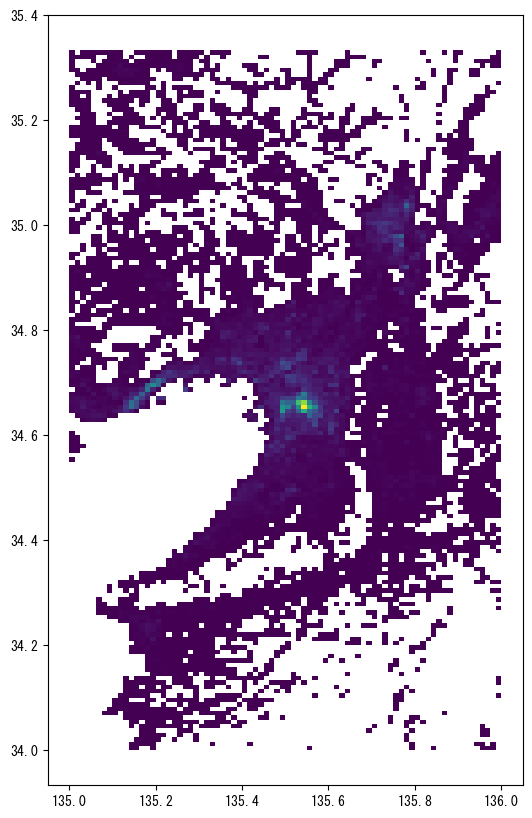

In [25]:
osakamesh.plot(figsize=(10,10),column='T000846022')

In [26]:
osakamesh.columns

Index(['KEY_CODE', 'MESH1_ID', 'MESH2_ID', 'MESH3_ID', 'OBJ_ID', 'geometry',
       'T001100001', 'T001100002', 'T001100003', 'T001100004', 'T001100005',
       'T001100006', 'T001100007', 'T001100008', 'T001100009', 'T001100010',
       'T001100011', 'T001100012', 'T001100013', 'T001100014', 'T001100015',
       'T001100016', 'T001100017', 'T001100018', 'T001100019', 'T001100020',
       'T001100021', 'T001100022', 'T001100023', 'T001100024', 'T001100025',
       'T001100026', 'T001100027', 'T001100028', 'T001100029', 'T001100030',
       'T001100031', 'T001100032', 'T001100033', 'T001100034', 'T001100035',
       'T001100036', 'T001100037', 'T001100038', 'T001100039', 'T001100040',
       'T001100041', 'T001100042', 'T001100043', 'T001100044', 'T001100045',
       'T001100046', 'T001100047', 'T001100048', 'T001100049', 'T001100050',
       'T000846001', 'T000846002', 'T000846003', 'T000846004', 'T000846005',
       'T000846006', 'T000846007', 'T000846008', 'T000846009', 'T000846010',

<Axes: >

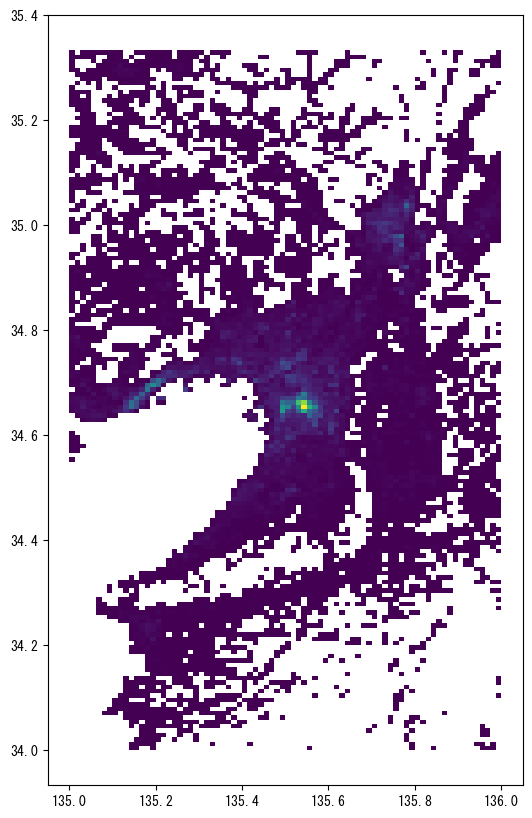

In [27]:
osakamesh.plot(figsize=(10,10),column='T000846022')

In [28]:
osakamesh=osakamesh.to_crs(3857)

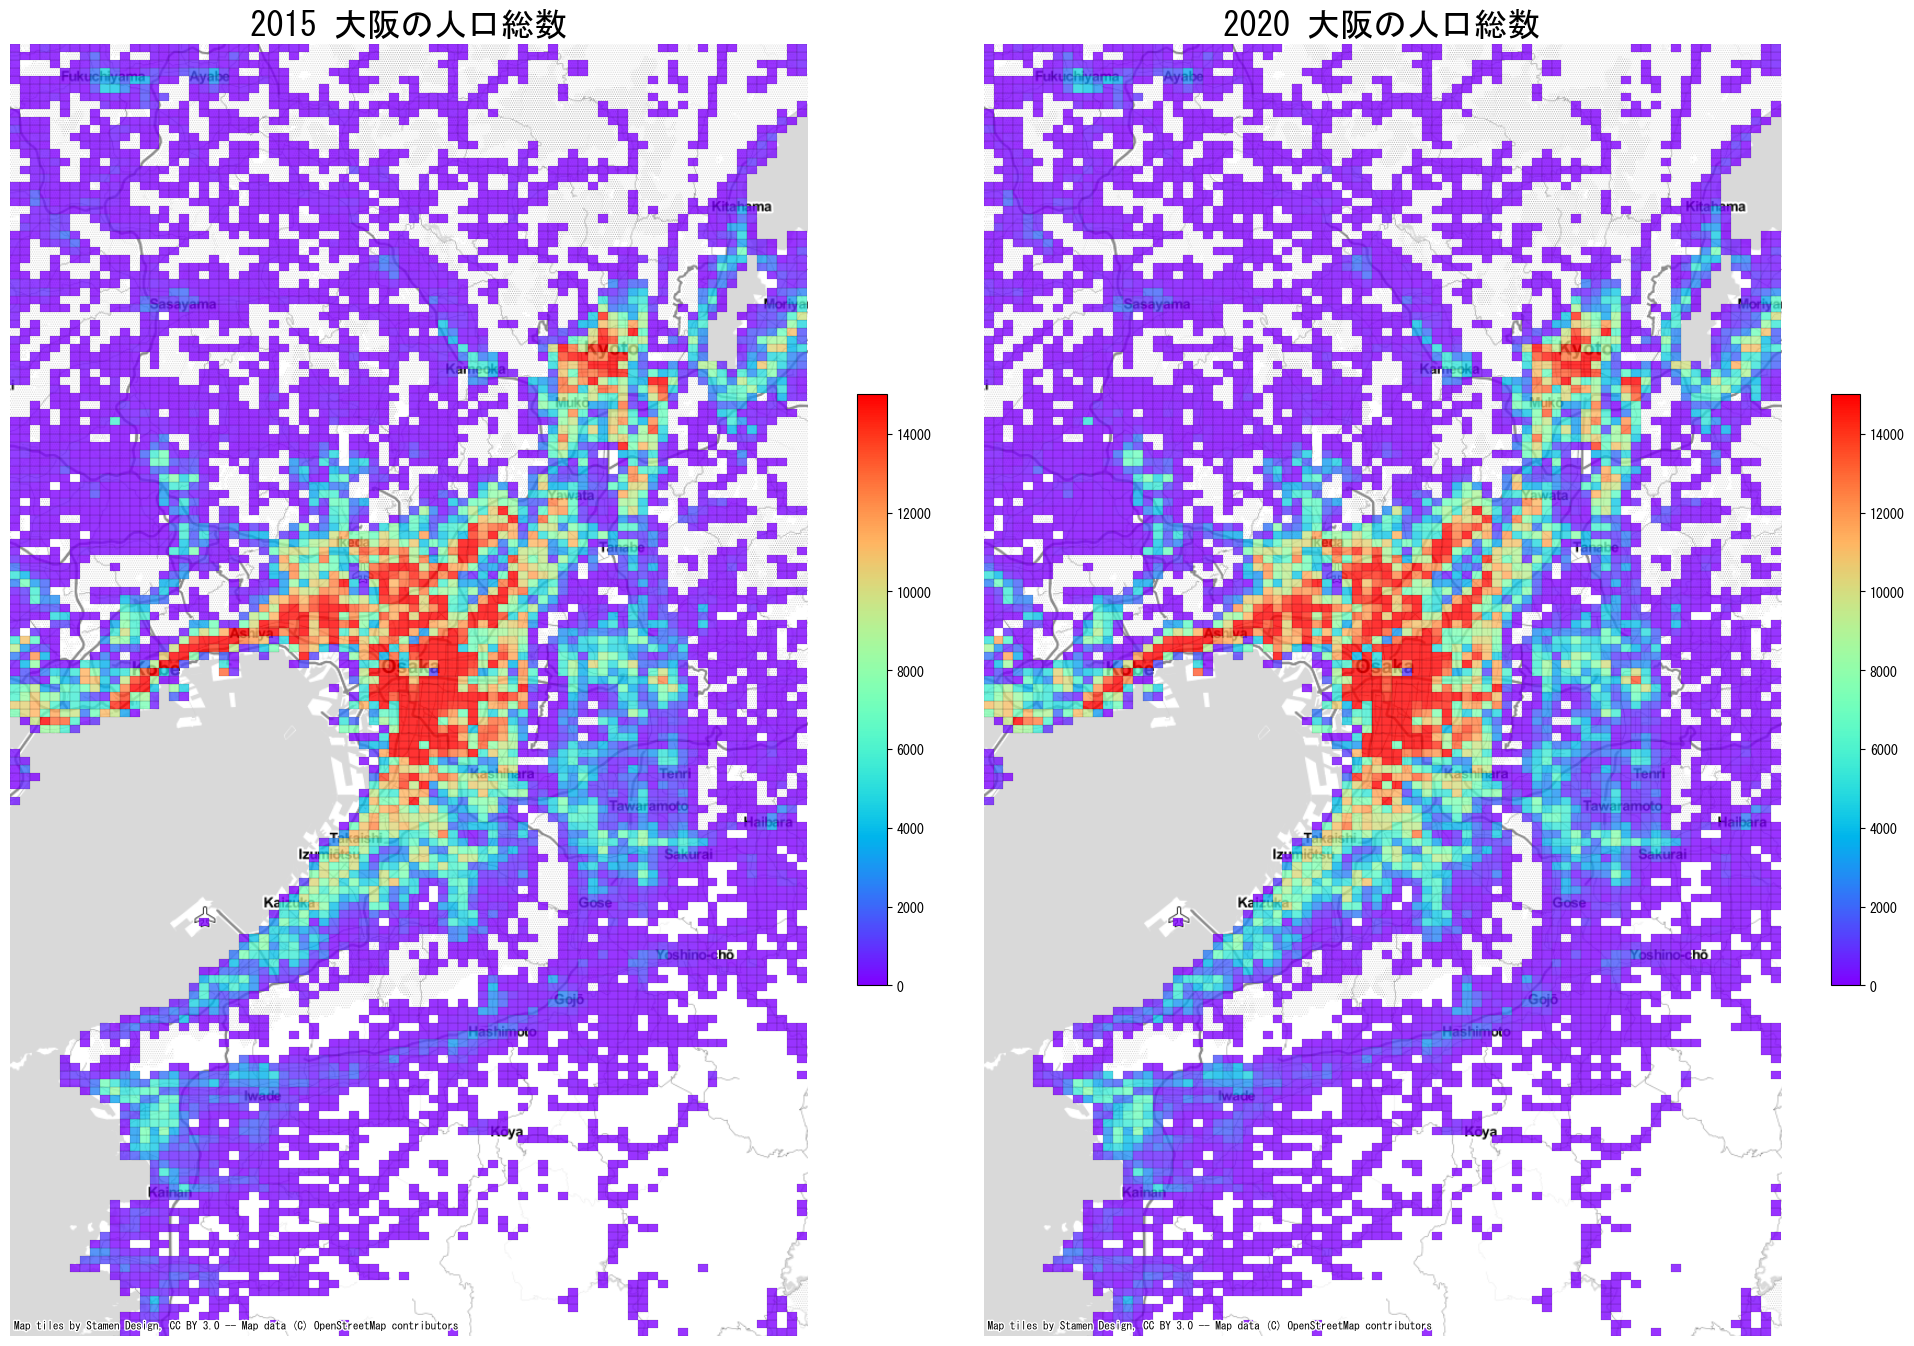

In [61]:
# population map
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,20)) # 1 row, 2 columns, side by side

# 2015 population
osakamesh.plot(ax = ax[0], # 左のマップ
    column='T000846001',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='rainbow',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=0,
         vmax=15000)

# 2020 population
osakamesh.plot(ax = ax[1], # 右のマップ
    column='T001100001',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='rainbow',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=0,
         vmax=15000)

# hide axes
ax[0].axis('off') # 左
ax[1].axis('off') # 右

# title
ax[0].set_title('2015 大阪の人口総数',fontsize=24); # 左
ax[1].set_title('2020 大阪の人口総数',fontsize=24); # 右

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = osakamesh.total_bounds

# Set the plot limits based on the total bounds
ax[0].set_xlim(xmin, xmax) # 左
ax[0].set_ylim(ymin, ymax) # 左 
ax[1].set_xlim(xmin, xmax) # 右
ax[1].set_ylim(ymin, ymax) # 右

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax[0],source=cx.providers.Stamen.TonerLite) # 左
cx.add_basemap(ax[1],source=cx.providers.Stamen.TonerLite) # 右

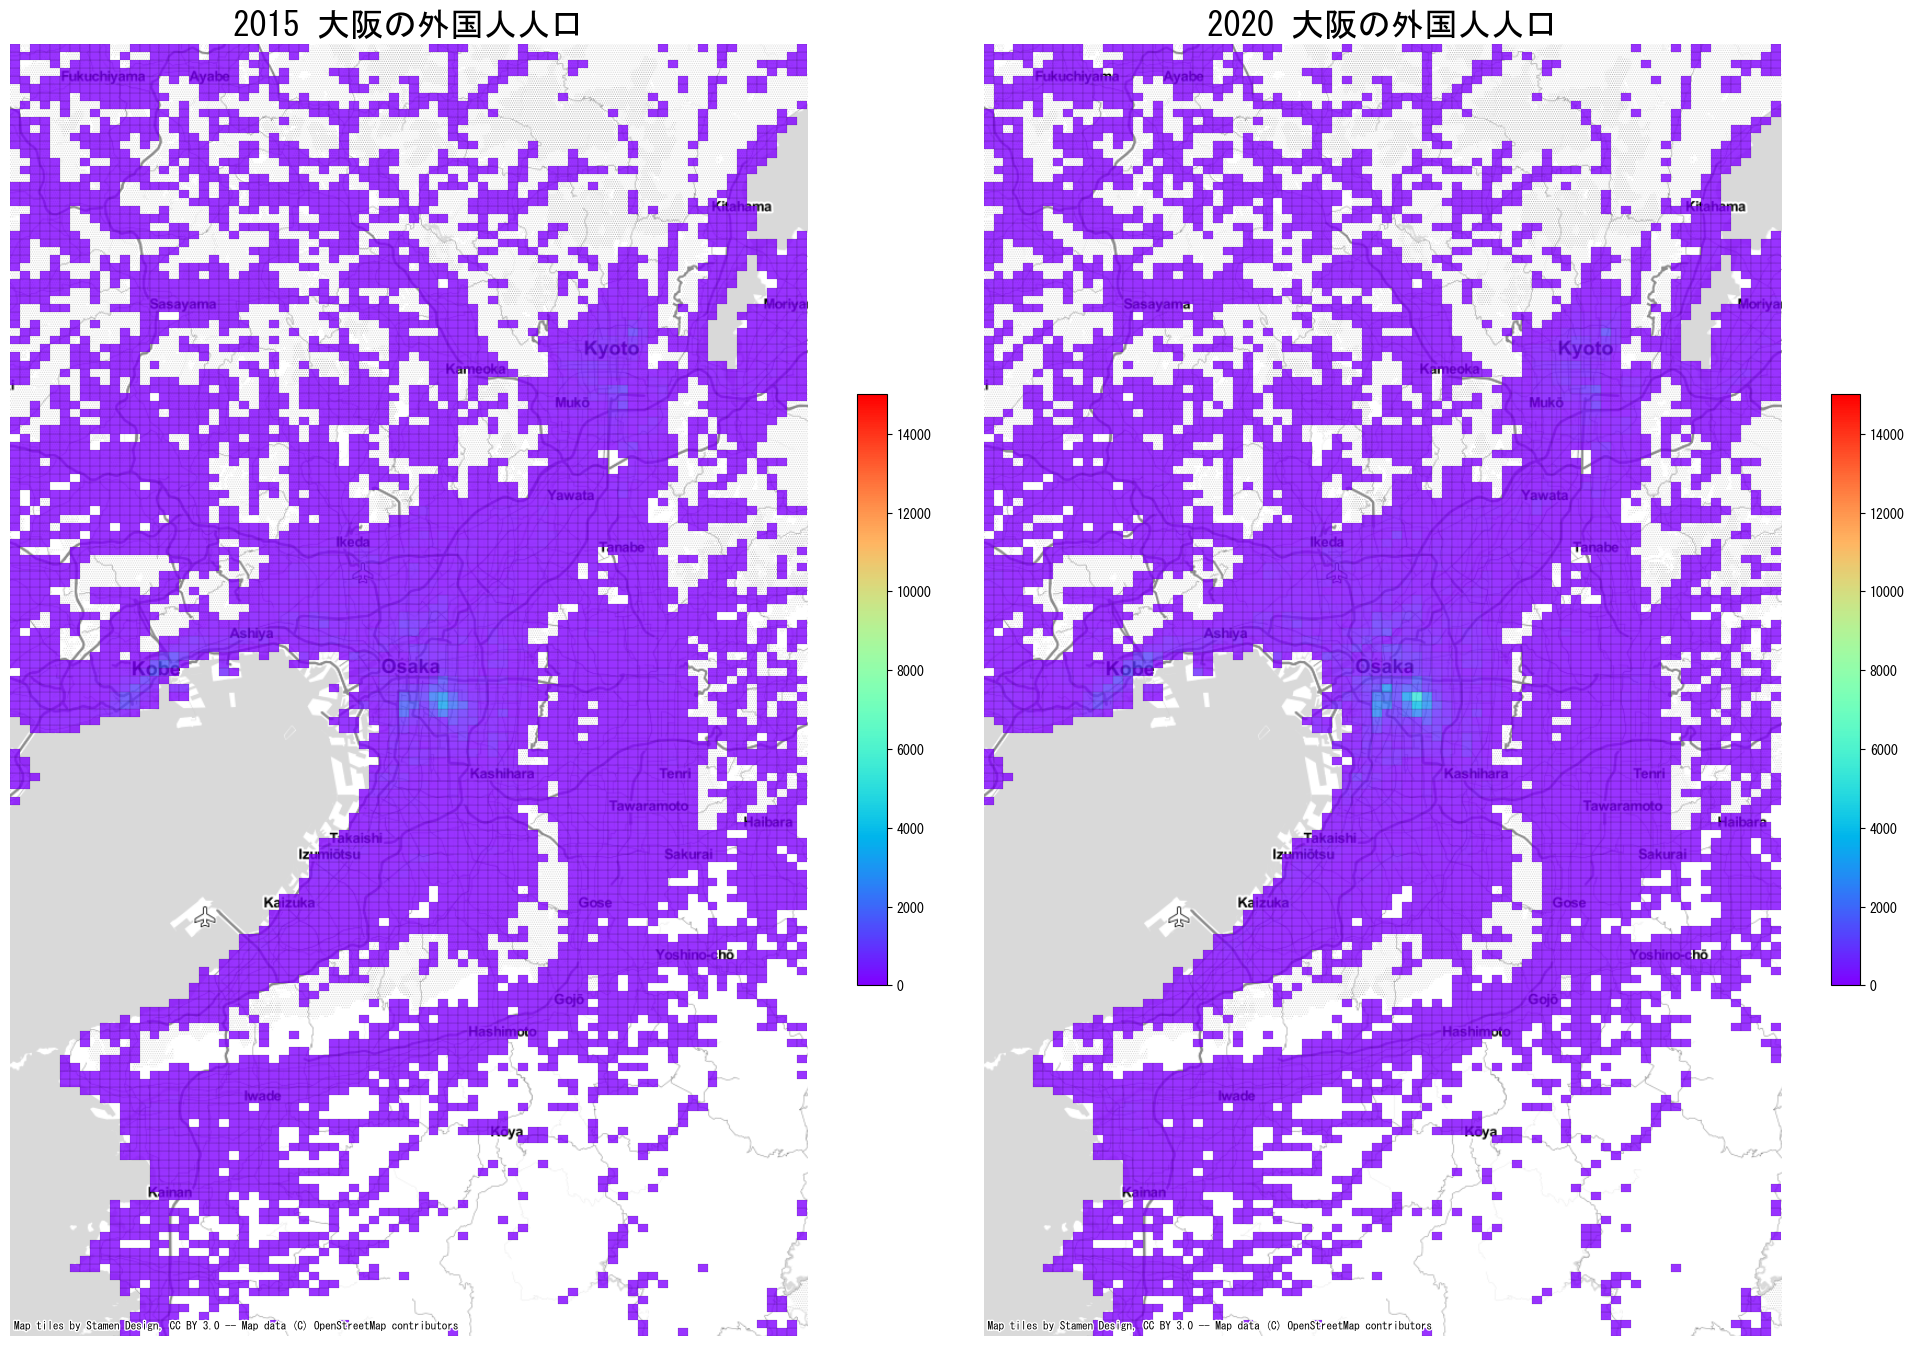

In [60]:
# population map
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,20)) # 1 row, 2 columns, side by side

# 2015 population
osakamesh.plot(ax = ax[0], # 左のマップ
    column='T000846022',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='rainbow',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=0,
         vmax=15000)

# 2020 population
osakamesh.plot(ax = ax[1], # 右のマップ
    column='T001100031',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='rainbow',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=0,
         vmax=15000)

# hide axes
ax[0].axis('off') # 左
ax[1].axis('off') # 右

# title
ax[0].set_title('2015 大阪の外国人人口',fontsize=24); # 左
ax[1].set_title('2020 大阪の外国人人口',fontsize=24); # 右

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = osakamesh.total_bounds

# Set the plot limits based on the total bounds
ax[0].set_xlim(xmin, xmax) # 左
ax[0].set_ylim(ymin, ymax) # 左 
ax[1].set_xlim(xmin, xmax) # 右
ax[1].set_ylim(ymin, ymax) # 右

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax[0],source=cx.providers.Stamen.TonerLite) # 左
cx.add_basemap(ax[1],source=cx.providers.Stamen.TonerLite) # 右

In [31]:
# calculate population change 【人口推移】
osakamesh['pop_jinko_change_2015_2020']=osakamesh['T001100001']-osakamesh['T000846001']

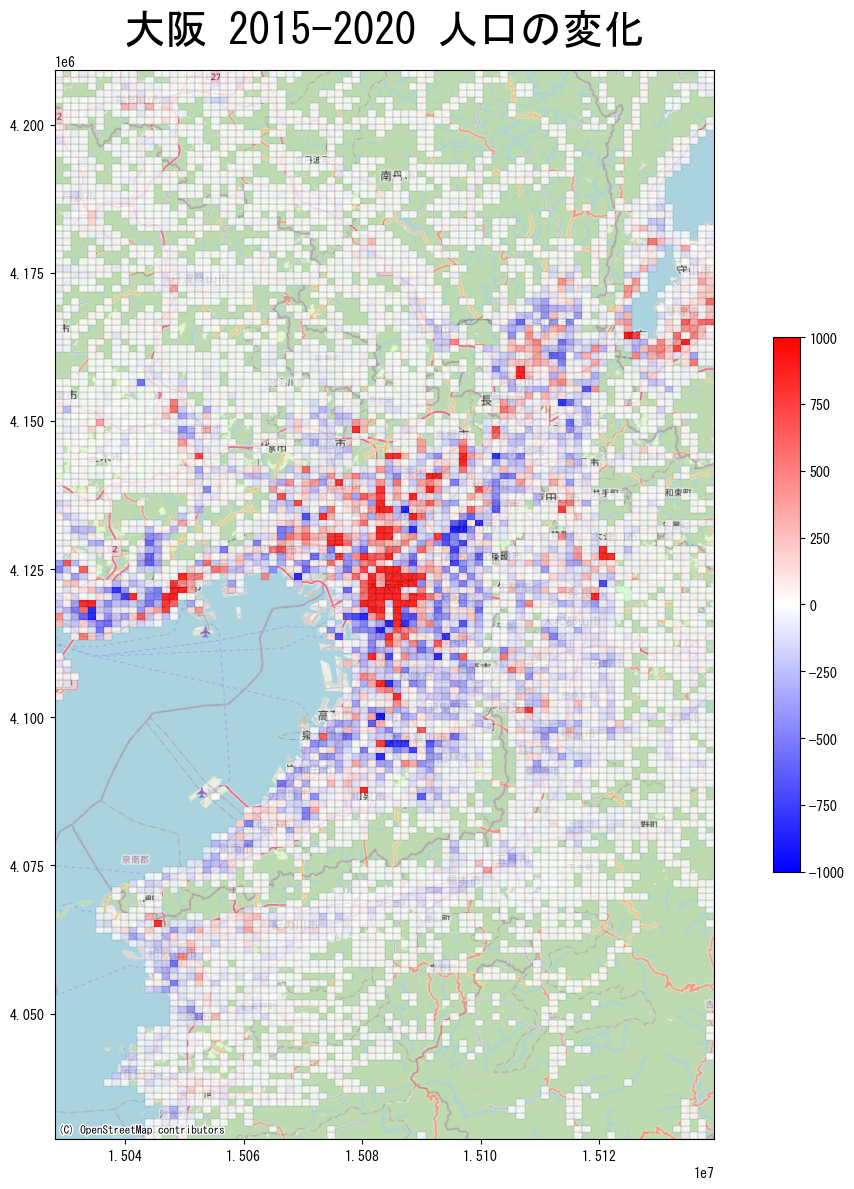

In [32]:
# population map
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12))

# 2015-2020 population change
osakamesh.plot(ax = ax,
    column='pop_jinko_change_2015_2020',
         legend=True,
         legend_kwds={'shrink': 0.5},
         cmap='bwr',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=-1000, # vminとvmaxが同じことによって、中間値がゼロになる
         vmax=1000
         )

# hide axes
#ax.axis('off')

# title
ax.set_title('大阪 2015-2020 人口の変化',fontsize=30, pad=20)

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = osakamesh.total_bounds

# Set the plot limits based on the total bounds
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax,source=cx.providers.OpenStreetMap.Mapnik)

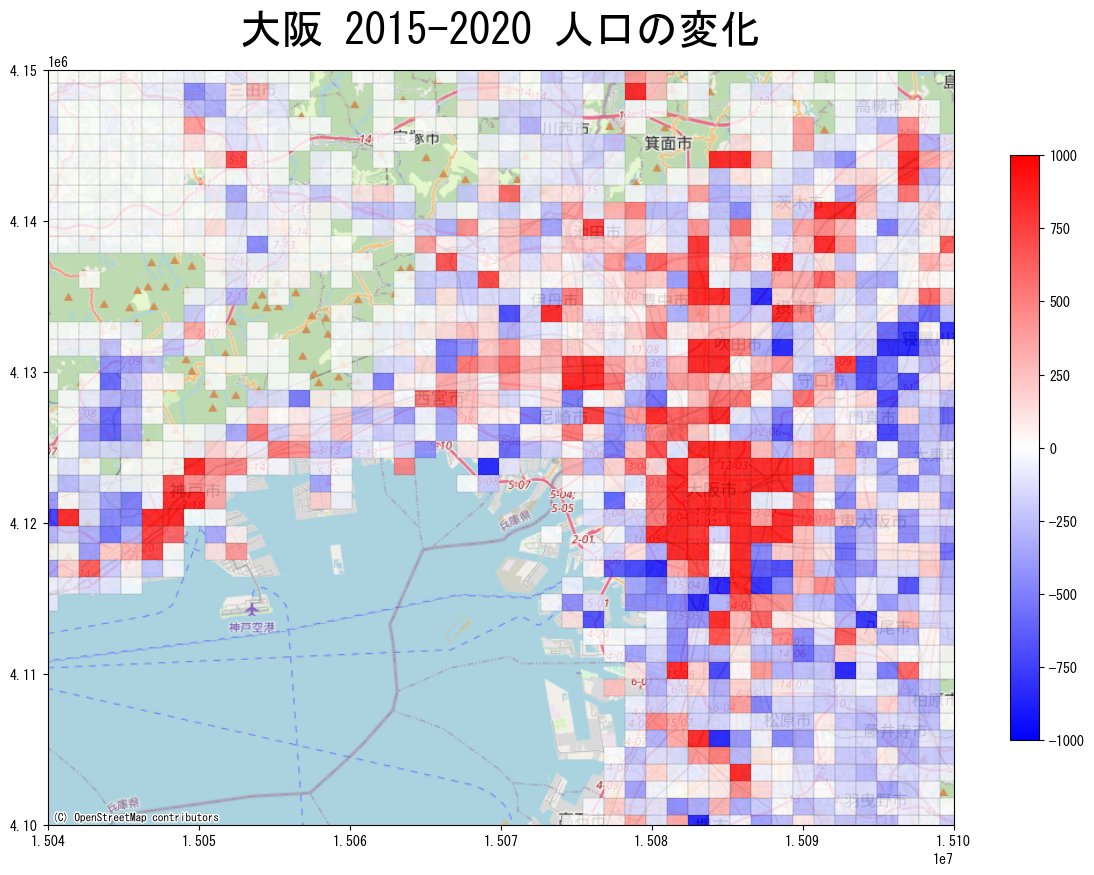

In [33]:
# population map
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12))

# 2015-2020 population change
osakamesh.plot(ax = ax,
    column='pop_jinko_change_2015_2020',
         legend=True,
         legend_kwds={'shrink': 0.5},
         cmap='bwr',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=-1000, # vminとvmaxが同じことによって、中間値がゼロになる
         vmax=1000
         )

# hide axes
#ax.axis('off')

# title
ax.set_title('大阪 2015-2020 人口の変化',fontsize=30, pad=20)

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = osakamesh.total_bounds

# Set the plot limits based on the total bounds
ax.set_xlim(15040000, 15100000)
ax.set_ylim(4100000,4150000)

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax,source=cx.providers.OpenStreetMap.Mapnik)

In [34]:
# calculate population change 【人口推移】
osakamesh['pop_change_2015_2020']=osakamesh['T001100031']-osakamesh['T000846022']


In [55]:
popgaikoku2015=osakamesh['T000846022'].sum()
popgaikoku2015

267410.0

In [50]:
popgaikoku2020=osakamesh['T001100031'].sum()
popgaikoku2020

342411.0

In [59]:
(popgaikoku2020-popgaikoku2015)/popgaikoku2015*100

28.04719344826297

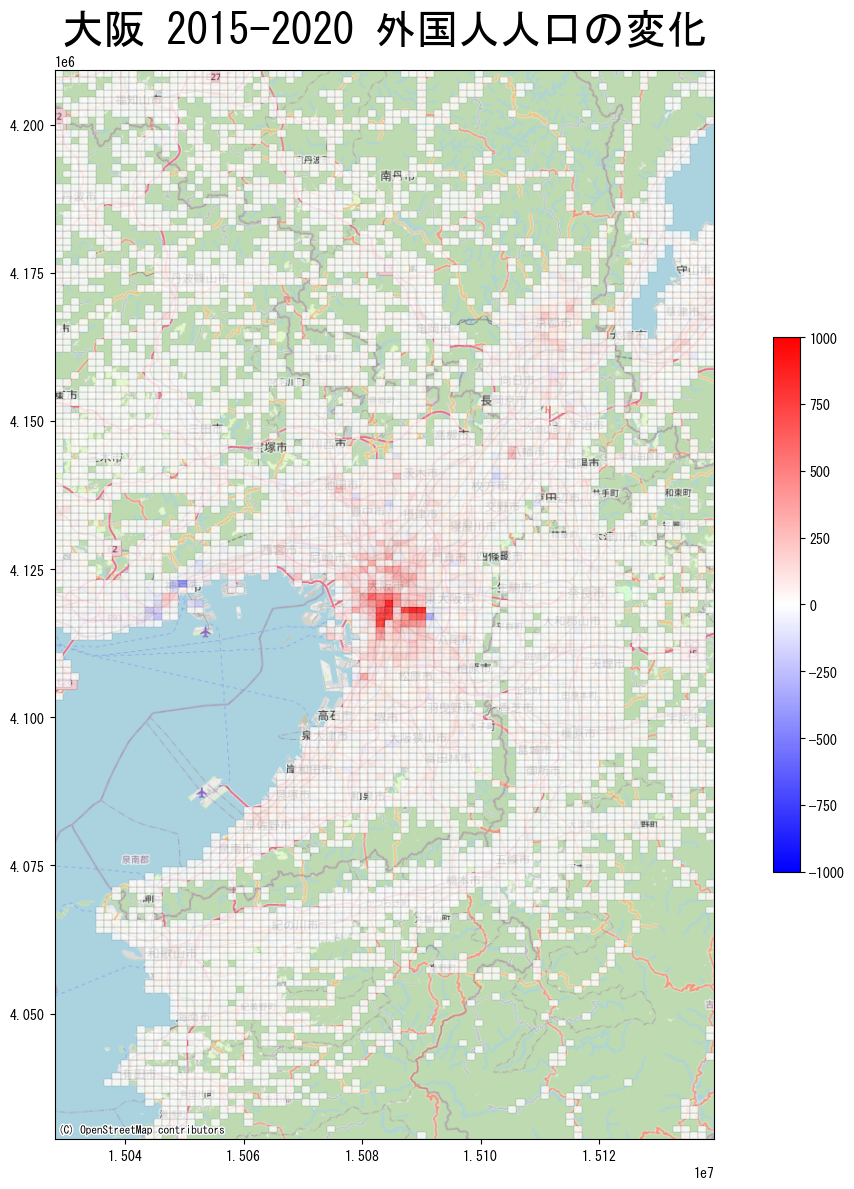

In [35]:
# population map
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12))

# 2015-2020 population change
osakamesh.plot(ax = ax,
    column='pop_change_2015_2020',
         legend=True,
         legend_kwds={'shrink': 0.5},
         cmap='bwr',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=-1000, # vminとvmaxが同じことによって、中間値がゼロになる
         vmax=1000
         )

# hide axes
#ax.axis('off')

# title
ax.set_title('大阪 2015-2020 外国人人口の変化',fontsize=30, pad=20)

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = osakamesh.total_bounds

# Set the plot limits based on the total bounds
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax,source=cx.providers.OpenStreetMap.Mapnik)

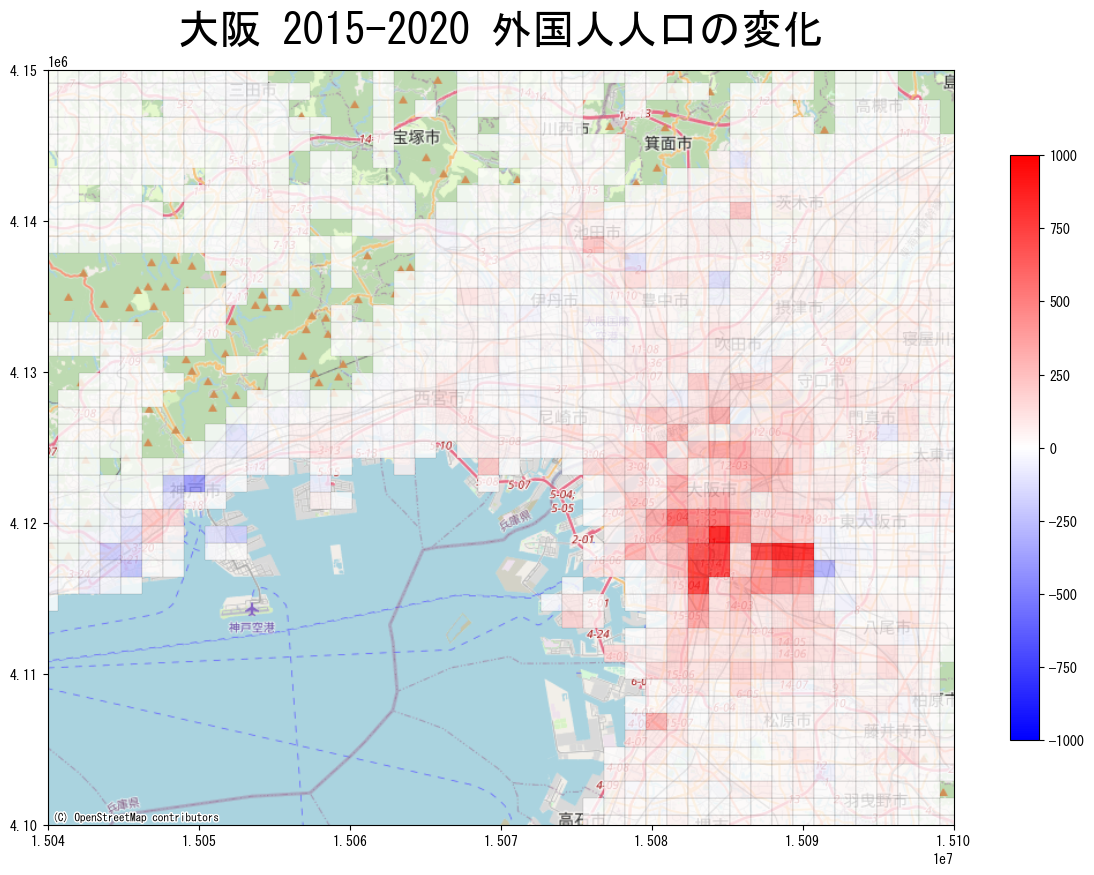

In [36]:
# population map
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12))

# 2015-2020 population change
osakamesh.plot(ax = ax,
    column='pop_change_2015_2020',
         legend=True,
         legend_kwds={'shrink': 0.5},
         cmap='bwr',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=-1000, # vminとvmaxが同じことによって、中間値がゼロになる
         vmax=1000
         )

# hide axes
#ax.axis('off')

# title
ax.set_title('大阪 2015-2020 外国人人口の変化',fontsize=30, pad=20)

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = osakamesh.total_bounds

# Set the plot limits based on the total bounds
ax.set_xlim(15040000, 15100000)
ax.set_ylim(4100000,4150000)

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax,source=cx.providers.OpenStreetMap.Mapnik)

In [56]:
popsojinko2015=osakamesh['T000846001'].sum()
popsojinko2015

17325782.0

In [57]:
popsojinko2020=osakamesh['T001100001'].sum()
popsojinko2020

17240345.0

In [58]:
(popsojinko2020-popsojinko2015)/popsojinko2015*100

-0.493120599116392